In [1]:
import numpy as np
import math
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fig= plt.figure(figsize=(6,4), dpi=300)
font = {'family' : 'times new roman',
       'weight' : 'bold',
       'size'   : 18}
plt.rc('font', **font)

<Figure size 1800x1200 with 0 Axes>

In [3]:
df1 = pd.read_csv("Results/Probabilityscores_f1_0.5-plotting.csv")
#df1 = pd.read_csv("Probabilityscores_without_f1.csv")

In [4]:
df1_1 = df1.loc[:, df1.columns != 'Meter']

In [5]:
#df1_1

In [6]:
dft = df1_1.transpose()

In [7]:
dft1 = dft.rename(columns=dft.iloc[0]).drop(dft.index[0])

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


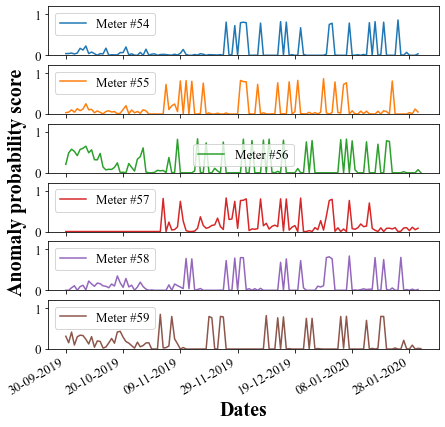

In [127]:
#dft1.plot(style='.-')
plt.rcParams.update({'font.size': 13})
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.labelsize"] = 20
#plt.subplots_adjust(right=0.75)
plt.rcParams['figure.figsize'] = [7, 7]
#dft1.plot(ylim=(0,1))
dft1.plot.line(ylim=(0,1.2), subplots=True)
#plt.title('Probability scores [0, 1]')
plt.xlabel('Dates')
#plt.ylabel(-16, 4, 'Anomaly probability scores', ha='center', va='center', labelpad = 20)
# Set common labels
#plt.text(60, -1.3, 'Dates', ha='center', va='center', weight='bold', size=16)
plt.text(-17, 4.1, 'Anomaly probability score', ha='center', va='center', rotation='vertical', weight='bold', size=20)
plt.xticks(rotation=30)
#plt.yticks(np.arange(0, 1.1, 0.5))
plt.savefig(f"Results/F7_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [8]:
dft1.index.names = ['Dates']

In [9]:
dft1.reset_index(inplace = True)

In [10]:
dft1['Dates']= pd.to_datetime(dft1['Dates'], dayfirst = True)

In [11]:
dft1['Day of week'] = dft1['Dates'].dt.day_name()
dft1['Dates'] = dft1['Dates'].dt.date

In [12]:
dft1['Meter #1'] = dft1['Meter #1'].astype(float)

In [13]:
dft1.head()

,Dates,Meter #1,Meter #2,Meter #3,Meter #4,Meter #5,Meter #6,Meter #7,Day of week
0,2019-09-30,0.056408,0,0.125535,0.105852,0.252247,0,0.01066,Monday
1,2019-10-01,0.029832,0,0.270111,0.0912325,0.233209,0.165045,0.0112253,Tuesday
2,2019-10-02,0.000000,0,0.29438,0.409532,0.451671,0.28992,0.242103,Wednesday
3,2019-10-03,0.081102,0,0.186651,0.0224033,0.197659,0.389953,0.101917,Thursday
4,2019-10-04,0.098196,0.184928,0.014753,0.107965,0.38093,0.362371,0.231796,Friday


In [14]:
dft1_hm = dft1.pivot_table(index='Day of week', columns='Dates', values='Meter #1', fill_value=0)

In [15]:
dft1_hm.head(7)

Dates,2019-09-30,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,...,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-28,2020-01-29,2020-01-30,2020-01-31
Day of week,,,,,,,,,,,,,,,,,,,,,
Friday,0.000000,0.000000,0,0.000000,0.098196,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0,0,0.000000,0.000000,0,0.000000,0.000000,0.013617
Monday,0.056408,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.034819,0.000000,0.00000,...,0.000000,0.000000,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000
Saturday,0.000000,0.000000,0,0.000000,0.000000,0.082671,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0,0,0.850798,0.000000,0,0.000000,0.000000,0.000000
Sunday,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.045403,0.000000,0.000000,0.00000,...,0.000000,0.000000,0,0,0.000000,0.024749,0,0.000000,0.000000,0.000000
Thursday,0.000000,0.000000,0,0.081102,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0,0,0.000000,0.000000,0,0.000000,0.050443,0.000000
Tuesday,0.000000,0.029832,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.058734,0.00000,...,0.000459,0.000000,0,0,0.000000,0.000000,0,0.000000,0.000000,0.000000
Wednesday,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04192,...,0.000000,0.046489,0,0,0.000000,0.000000,0,0.756628,0.000000,0.000000


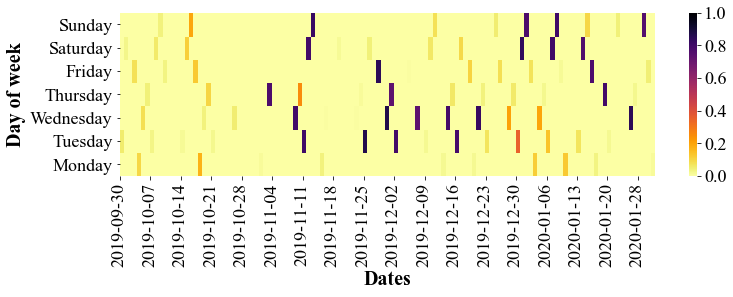

In [20]:
plt.figure(figsize=(12, 3))
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.labelsize"] = 20
p = sns.heatmap(dft1_hm, cmap="inferno_r", fmt="d", vmax=1)
freq = 7
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

p.set_xticks(dft1.index[::freq])
p.set_xticklabels(dft1.iloc[::freq]["Dates"])

p.set_yticklabels(weekday, rotation=0)
p.invert_yaxis()
plt.savefig(f"Results/ProbilityScore_with_f1_0.5_plot.png", dpi=300, bbox_inches='tight')

In [8]:
fig= plt.figure(figsize=(6,4), dpi=300)
font = {'family' : 'times new roman',
       'size'   : 16}
plt.rc('font', **font)

<Figure size 1800x1200 with 0 Axes>

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


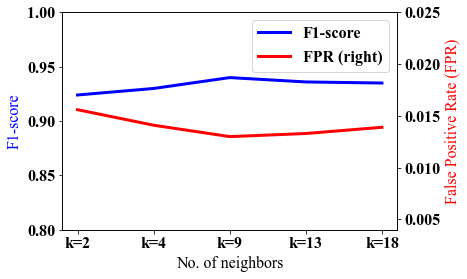

In [9]:
#creating dataframe for plot
dataset = pd.DataFrame({'No. of neighbors':['k=2', 'k=4', 'k=9', 'k=13', 'k=18'],       
                   'F1-score': [0.924,0.93,0.94,0.936,0.935],
                   'FPR': [0.0156,0.0141,0.013,0.0133,0.0139]})
  
# creating axes object and defining plot
ax = dataset.plot(kind = 'line', x = 'No. of neighbors', y = 'F1-score', color = 'Blue', linewidth = 3)
  
ax2 = dataset.plot(kind = 'line', x = 'No. of neighbors', y = 'FPR', secondary_y = True, color = 'Red',
                   linewidth = 3, ax = ax)
#title of the plot
#plt.title("Student Data")
  
#labeling x and y-axis
#ax.set_xlabel('Name', color = 'g')
ax.set_ylim(0.8, 1)
ax2.set_ylim(0.004, 0.025)
ax.set_ylabel('F1-score', color = "b")
ax2.set_ylabel('False Positive Rate (FPR)', color = 'r')
  
#defining display layout 
#plt.tight_layout()
plt.savefig(f"Plot_different K.png", dpi=300, bbox_inches='tight')
#show plot
plt.show()

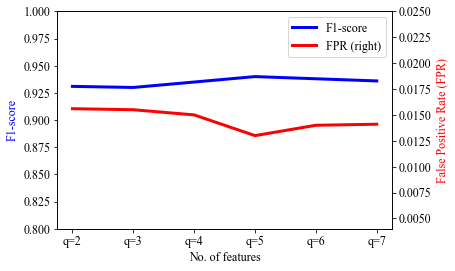

In [41]:
#creating dataframe for plot
dataset = pd.DataFrame({'No. of features':['q=2', 'q=3', 'q=4', 'q=5', 'q=6', 'q=7'],       
                   'F1-score': [0.931, 0.93, 0.935, 0.94, 0.938, 0.936],
                   'FPR': [0.0156, 0.0155, 0.015, 0.013, 0.014, 0.0141]})
  
# creating axes object and defining plot
ax = dataset.plot(kind = 'line', x = 'No. of features', y = 'F1-score', color = 'Blue', linewidth = 3)
  
ax2 = dataset.plot(kind = 'line', x = 'No. of features', y = 'FPR', secondary_y = True, color = 'Red',
                   linewidth = 3, ax = ax)
#title of the plot
#plt.title("Student Data")
  
#labeling x and y-axis
#ax.set_xlabel('Name', color = 'g')
ax.set_ylim(0.8, 1)
ax2.set_ylim(0.004, 0.025)
ax.set_ylabel('F1-score', color = "b")
ax2.set_ylabel('False Positive Rate (FPR)', color = 'r')
  
#defining display layout 
#plt.tight_layout()
plt.savefig(f"Plot_different q.png", dpi=300, bbox_inches='tight')
#show plot
plt.show()